In [3]:
import pandas as pd
import statistics as st

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import numpy as np

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
data=pd.read_excel('PRO_Car_Data.xlsx')
data

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,24.0,Petrol,1652.0,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,15.0,CNG,1652.0,...,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,24.0,Petrol,1652.0,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1545 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
1272,1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1550 kg,"Drive side airbag, Curtain airbags, Driver fro...",Yes,Yes
1273,1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1482 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes
1274,1274,Honda,City,V Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1455 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   S. No.                          1276 non-null   int64  
 1   Make                            1201 non-null   object 
 2   Model                           1276 non-null   object 
 3   Variant                         1276 non-null   object 
 4   Displacement                    1264 non-null   float64
 5   Cylinders                       1210 non-null   float64
 6   Valves_Per_Cylinder             1174 non-null   float64
 7   Fuel_Tank_Capacity_litre        1207 non-null   float64
 8   Fuel_Type                       1276 non-null   object 
 9   Height_mm                       1275 non-null   float64
 10  Length_mm                       1276 non-null   float64
 11  Width_mm                        1264 non-null   float64
 12  Body_Type                       12

Treat missing values

In [15]:
#ensure no duplicate columns
dup=data[data.duplicated()]
dup

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning


In [17]:
#data pre processing
data.isnull().sum()

S. No.                               0
Make                                75
Model                                0
Variant                              0
Displacement                        12
Cylinders                           66
Valves_Per_Cylinder                102
Fuel_Tank_Capacity_litre            69
Fuel_Type                            0
Height_mm                            1
Length_mm                            0
Width_mm                            12
Body_Type                            6
Doors                                4
City_Mileage_km_litre              555
Highway_Mileage_km_litre           800
Kerb_Weight                        365
Power                                0
Torque                               2
Seating_Capacity                     6
Central_Locking                    149
Child_Safety_Locks                  75
Hill_Assist                        796
Drive_Modes                       1081
High_Speed_Alert_System           1068
ABS_(Anti-lock_Braking_Sy

In [19]:
#filling 'Make' column with 'Not available'
data['Make']=data['Make'].fillna('Not Available')
#filling 'Body_Type' column with 'Not available'
data['Body_Type']=data['Body_Type'].fillna('Not Available')
#filling 'Drive_Modes' column with 'Not available'
data['Drive_Modes']=data['Drive_Modes'].fillna('Not Available')
#filling 'Displacement' column with mean
data['Displacement']=data['Displacement'].fillna(data['Displacement'].mean())
#filling 'Height_mm' column with mean
data['Height_mm']=data['Height_mm'].fillna(data['Height_mm'].mean())
#filling 'Fuel_Tank_Capacity_litre' column with mean
data['Fuel_Tank_Capacity_litre']=data['Fuel_Tank_Capacity_litre'].fillna(data['Fuel_Tank_Capacity_litre'].mean())
#filling 'Valves_Per_Cylinder' column with mean
data['Valves_Per_Cylinder']=data['Valves_Per_Cylinder'].fillna(data['Valves_Per_Cylinder'].mean())
#filling 'Fuel_Tank_Capacity_litre' column with mean
data['Fuel_Tank_Capacity_litre']=data['Fuel_Tank_Capacity_litre'].fillna(data['Fuel_Tank_Capacity_litre'].mean())
#filling 'Torque' column with mean
data['Torque']=data['Torque'].fillna(data['Torque'].mean())
#filling 'Cylinders' column with mean
data['Cylinders']=data['Cylinders'].fillna(data['Cylinders'].mean())
data.isnull().sum()

S. No.                               0
Make                                 0
Model                                0
Variant                              0
Displacement                         0
Cylinders                            0
Valves_Per_Cylinder                  0
Fuel_Tank_Capacity_litre             0
Fuel_Type                            0
Height_mm                            0
Length_mm                            0
Width_mm                            12
Body_Type                            0
Doors                                4
City_Mileage_km_litre              555
Highway_Mileage_km_litre           800
Kerb_Weight                        365
Power                                0
Torque                               0
Seating_Capacity                     6
Central_Locking                    149
Child_Safety_Locks                  75
Hill_Assist                        796
Drive_Modes                          0
High_Speed_Alert_System           1068
ABS_(Anti-lock_Braking_Sy

In [21]:
#filling 'City_Mileage_km_litre','Highway_Mileage_km_litre' column with mean of each manufacturers
dts=pd.pivot_table(data,index='Make',values=['City_Mileage_km_litre','Highway_Mileage_km_litre'],aggfunc='mean')
dts

,City_Mileage_km_litre,Highway_Mileage_km_litre
Make,,
Aston Martin,6.700000,10.450000
Audi,12.081250,12.942857
Bentley,5.020000,7.840000
Bmw,13.686875,15.835000
Datsun,20.946667,24.000000
Dc,8.000000,10.000000
Ferrari,4.320000,6.900000
Fiat,16.090909,18.409091
Force,14.000000,17.000000


In [23]:
for index,row in dts.iterrows():
    data.loc[(data['Make']==index) & (data['City_Mileage_km_litre'].isnull()),'City_Mileage_km_litre']=row['City_Mileage_km_litre']
    data.loc[(data['Make']==index) & (data['Highway_Mileage_km_litre'].isnull()),'Highway_Mileage_km_litre']=row['Highway_Mileage_km_litre']

In [25]:
data['City_Mileage_km_litre']=data['City_Mileage_km_litre'].fillna(data['City_Mileage_km_litre'].mean())
data['Highway_Mileage_km_litre']=data['Highway_Mileage_km_litre'].fillna(data['Highway_Mileage_km_litre'].mean())

In [27]:
data['City_Mileage_km_litre'].isnull().sum()
data['Highway_Mileage_km_litre'].isnull().sum()

0

In [29]:
#task 1: top 5 preferred body types
bt=data.groupby(['Body_Type'])[['Make']].count().sort_values('Make').tail(5)
bt
#SUV is the most prefered body type; Sedan and hatchback together with suv comprises almost 90% of all body tpe

,Make
Body_Type,
MUV,39
Coupe,41
Hatchback,316
Sedan,333
SUV,447


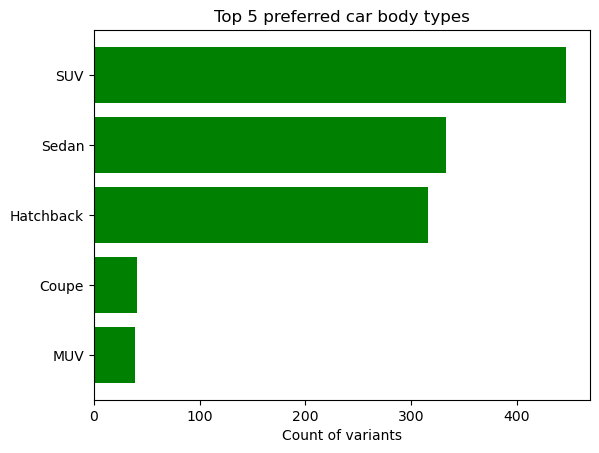

In [31]:
plt.barh(bt.index,bt['Make'],color='green')
plt.title('Top 5 preferred car body types')
plt.xlabel('Count of variants')
plt.show()

In [33]:
#task 2: Details of car that adapt to all conditions: Normal, comfort, sports, eco and power mode
data.groupby(['Drive_Modes'])[['Make']].count().sort_values('Make')

,Make
Drive_Modes,
"Sport, Normal, Eco",1
"Sport, Normal, Comfort",1
Eco,1
"Eco, Sport, Normal",1
"Normal, Comfort, Eco, Sport, Power Mode",2
"Eco, Sport",2
"Eco, Sport, Normal, Comfort",3
"Comfort, Eco, Sport, Normal",4
"Comfort, Eco, Sport",4


In [35]:
mode_dt=data[data['Drive_Modes']=='Normal, Comfort, Eco, Sport, Power Mode'].transpose()
mode_dt
# only 2 variants is suited for all modes and those both car are produced by Audi; Audi Q8 and Audi A8L are the 2 cars; 

,321,330
S. No.,321,330
Make,Audi,Audi
Model,Q8,A8 L
Variant,55 Tfsi Quattro Tiptronic,55 Tfsi Quattro
Displacement,2995.0,2995.0
Cylinders,4.0,8.0
Valves_Per_Cylinder,4.0,4.0
Fuel_Tank_Capacity_litre,85.0,82.0
Fuel_Type,Petrol,Petrol
Height_mm,1740.0,1485.0


In [37]:
#task 3: top 10 manufactures based on city milege
top_cmlg=pd.pivot_table(data,index='Make',values='City_Mileage_km_litre',aggfunc='mean').sort_values('City_Mileage_km_litre').tail(10)
top_cmlg

,City_Mileage_km_litre
Make,
Fiat,16.090909
Volkswagen,16.225000
Hyundai,16.679853
Honda,16.805714
Lexus,18.150000
Tata,19.233542
Mahindra,20.003763
Renault,20.554286
Datsun,20.946667


In [61]:
top_cmlg.to_csv('Cmlg.csv')
ne_mlg.to_csv('Non el mlg.csv')


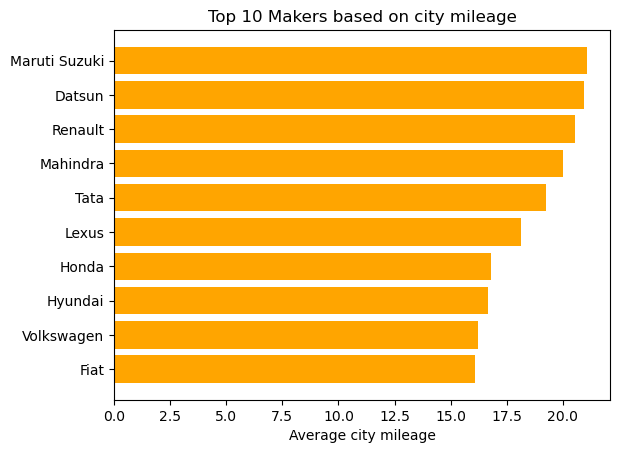

In [39]:
#visualisation
plt.barh(top_cmlg.index,top_cmlg['City_Mileage_km_litre'],color='orange')
plt.title('Top 10 Makers based on city mileage')
plt.xlabel('Average city mileage')
plt.show()

In [41]:
#task 4: top 20 Non-electric car manufacturers based on city mileage
non_elct=data[data['Fuel_Type']!='Electric']
non_elct

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,NaN,Not Available,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,24.0,Petrol,1652.0,...,NaN,Yes,NaN,Not Available,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,15.0,CNG,1652.0,...,NaN,Yes,Yes,Not Available,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,NaN,Not Available,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,24.0,Petrol,1652.0,...,NaN,Yes,NaN,Not Available,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Yes,NaN,Not Available,Yes,Yes,1545 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
1272,1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Yes,NaN,Not Available,Yes,Yes,1550 kg,"Drive side airbag, Curtain airbags, Driver fro...",Yes,Yes
1273,1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,...,Yes,Yes,NaN,Not Available,Yes,Yes,1482 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes
1274,1274,Honda,City,V Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,...,Yes,Yes,NaN,Not Available,Yes,Yes,1455 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes


In [43]:
ne_mlg=pd.pivot_table(data,index='Make',values='City_Mileage_km_litre',aggfunc='mean').sort_values('City_Mileage_km_litre').tail(20)
ne_mlg

,City_Mileage_km_litre
Make,
Jeep,13.975000
Force,14.000000
Toyota,14.293065
Nissan,15.324375
Kia,15.668182
Mg,15.668182
Bugatti,15.668182
Land Rover,15.668182
Bajaj,15.668182


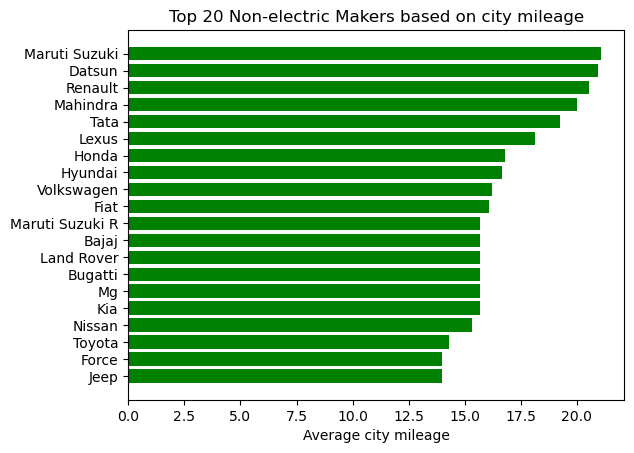

In [45]:
#visualisation
plt.barh(ne_mlg.index,ne_mlg['City_Mileage_km_litre'],color='green')
plt.title('Top 20 Non-electric Makers based on city mileage')
plt.xlabel('Average city mileage')
plt.show()
# maruti suzuki has the highest average mileage in case of non-electric cars; The top 20 manufacturers has average mileage range from 21 to 14 km per litre

In [47]:
#Task 5: Hyundai, Mahindra, Renault, skoda companies mean, median of city and highway mileage
filter=data[(data['Make']=='Hyundai')|(data['Make']=='Mahindra')|(data['Make']=='Renault')|(data['Make']=='Skoda')]
filter

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
12,12,Renault,Kwid,Rxe 0.8,799.0,3.0,4.0,28.0,Petrol,1490.0,...,NaN,Yes,NaN,Not Available,NaN,Yes,NaN,Driver frontal airbag,Yes,Yes
13,13,Renault,Kwid,Std 0.8,799.0,3.0,4.0,28.0,Petrol,1490.0,...,NaN,NaN,NaN,Not Available,NaN,Yes,NaN,Driver frontal airbag,NaN,Yes
14,14,Renault,Kwid,Rxl 0.8,799.0,3.0,4.0,28.0,Petrol,1490.0,...,Yes,Yes,NaN,Not Available,NaN,Yes,NaN,Driver frontal airbag,Yes,Yes
15,15,Renault,Kwid,Rxt 0.8,799.0,3.0,4.0,28.0,Petrol,1490.0,...,NaN,Yes,NaN,Not Available,NaN,Yes,NaN,Driver frontal airbag,Yes,Yes
16,16,Renault,Kwid,Rxt 1.0,999.0,3.0,4.0,28.0,Petrol,1490.0,...,Yes,Yes,NaN,Not Available,NaN,Yes,NaN,Driver frontal airbag,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,1249,Skoda,Octavia,Onyx 1.8 Tsi Dsg,1798.0,4.0,4.0,50.0,Petrol,1476.0,...,Yes,Yes,Yes,"Normal, Comfort, Eco, Sport",Yes,Yes,1860 kg,"Drive side airbag, Front passenger curtain air...",Yes,Yes
1250,1250,Skoda,Octavia,Onyx 2.0 Tdi Dsg,1968.0,4.0,4.0,50.0,Diesel,1476.0,...,Yes,Yes,Yes,"Comfort, Eco, Sport, Normal",Yes,Yes,1915 kg,"Drive side airbag, Driver frontal airbag, Fron...",Yes,Yes
1255,1255,Mahindra,Verito,1.5 D2,1461.0,4.0,3.0,50.0,Diesel,1540.0,...,NaN,Yes,NaN,Not Available,NaN,NaN,1630 kg,NaN,NaN,NaN
1256,1256,Mahindra,Verito,1.5 D4 Bs-Iv,1461.0,4.0,3.0,50.0,Diesel,1540.0,...,Yes,Yes,NaN,Not Available,NaN,NaN,1630 kg,NaN,Yes,NaN


In [49]:
cit_mean=pd.pivot_table(filter,index=['Make'],values=['City_Mileage_km_litre'],aggfunc='mean')
cit_mean
#Renault among 4 other companies has highest average city mileage

,City_Mileage_km_litre
Make,
Hyundai,16.679853
Mahindra,20.003763
Renault,20.554286
Skoda,13.953333


In [51]:
cit_med=pd.pivot_table(filter,index=['Make'],values=['City_Mileage_km_litre'],aggfunc='median')
cit_med
#Renault among 4 other companies has highest median for city mileage

,City_Mileage_km_litre
Make,
Hyundai,16.679853
Mahindra,16.000000
Renault,21.040000
Skoda,13.953333


In [53]:
hig_mean=pd.pivot_table(filter,index=['Make'],values=['Highway_Mileage_km_litre'],aggfunc='mean')
hig_mean
#Hyundai has the highest average highway mileage km per litre among the 4 companies

,Highway_Mileage_km_litre
Make,
Hyundai,18.294146
Mahindra,18.140175
Renault,17.690000
Skoda,17.268529


In [55]:
hig_med=pd.pivot_table(filter,index=['Make'],values=['Highway_Mileage_km_litre'],aggfunc='median')
hig_med
#Hyundai has the highest median in highway mileage km per litre compare to other 3 companies

,Highway_Mileage_km_litre
Make,
Hyundai,18.294146
Mahindra,18.140175
Renault,17.690000
Skoda,17.268529


In [57]:
#task6: Mean and median of city mileage for above mentioned 4 companies
cit_mlg=pd.DataFrame({'Make':list(cit_med.index),'Mean':cit_mean['City_Mileage_km_litre'],'Median':cit_med['City_Mileage_km_litre']})
cit_mlg

,Make,Mean,Median
Make,,,
Hyundai,Hyundai,16.679853,16.679853
Mahindra,Mahindra,20.003763,16.000000
Renault,Renault,20.554286,21.040000
Skoda,Skoda,13.953333,13.953333


<Axes: title={'center': 'Mean, Median of city milege'}, xlabel='Manufacturers'>

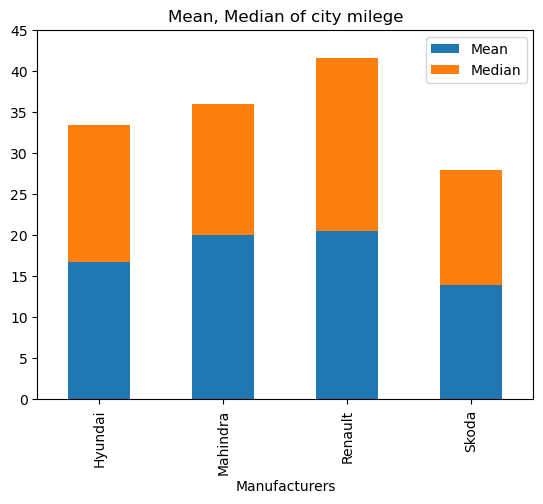

In [59]:
#stacked chart for the task
cit_mlg.plot(x='Make',kind='bar',stacked=True,title='Mean, Median of city milege',xlabel='Manufacturers',ylim=(0,45))
#Renault has the highest mean and median together compared to other 3 companies

In [63]:
#task 7: average(city + highway) for all companies
data.insert(30,'Avg_mileage',(data.City_Mileage_km_litre+data.Highway_Mileage_km_litre)/2)

In [65]:
avg_mlg=pd.pivot_table(data,index=['Make'],values=['Avg_mileage'],aggfunc='mean').sort_values('Avg_mileage',ascending=False)
avg_mlg

,Avg_mileage
Make,
Datsun,22.473333
Maruti Suzuki,20.867322
Tata,19.867990
Renault,19.122143
Mahindra,19.071969
Honda,18.058120
Volkswagen,17.727167
Lexus,17.588439
Hyundai,17.487000


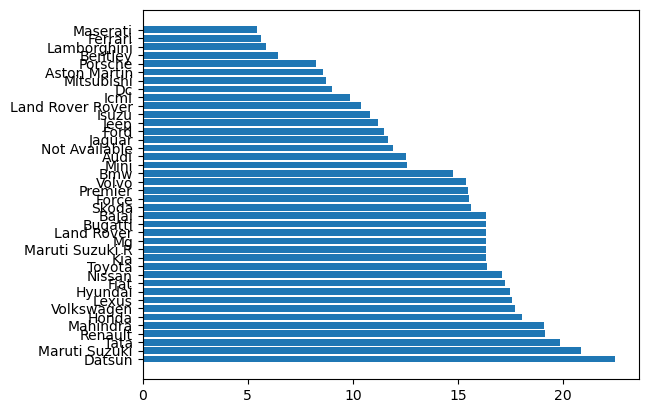

<Figure size 600x4000 with 0 Axes>

In [67]:
plt.barh(avg_mlg.index,avg_mlg['Avg_mileage'])
fig=plt.figure(figsize=(6,40))
plt.show()
# on average, Datsun and Maruti suzuki has highest average city and highway mileage

In [69]:
#task8: relationship between displacement and city mileage for top 10 cars based on city mileage
top=data.nlargest(10,'City_Mileage_km_litre')
top.iloc[:][['Make','Model','City_Mileage_km_litre','Displacement']]

,Make,Model,City_Mileage_km_litre,Displacement
687,Mahindra,E Verito,110.0,72.000000
688,Mahindra,E Verito,110.0,72.000000
689,Mahindra,E Verito,110.0,72.000000
615,Mahindra,E2O Plus,80.0,1858.804589
616,Mahindra,E2O Plus,80.0,1858.804589
155,Maruti Suzuki,Dzire,28.4,1248.000000
157,Maruti Suzuki,Dzire,28.4,1248.000000
159,Maruti Suzuki,Dzire,28.4,1248.000000
160,Maruti Suzuki,Dzire,28.4,1248.000000
164,Maruti Suzuki,Dzire,28.4,1248.000000


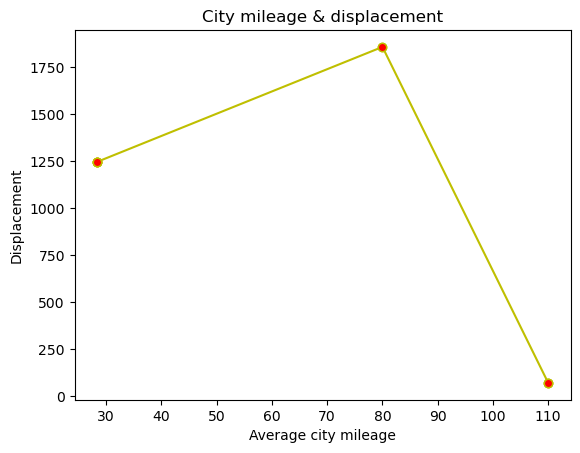

In [71]:
# line chart
plt.plot(top['City_Mileage_km_litre'],top['Displacement'],marker='o',mfc='r',color='y')
plt.title('City mileage & displacement')
plt.xlabel('Average city mileage')
plt.ylabel('Displacement')
plt.show()

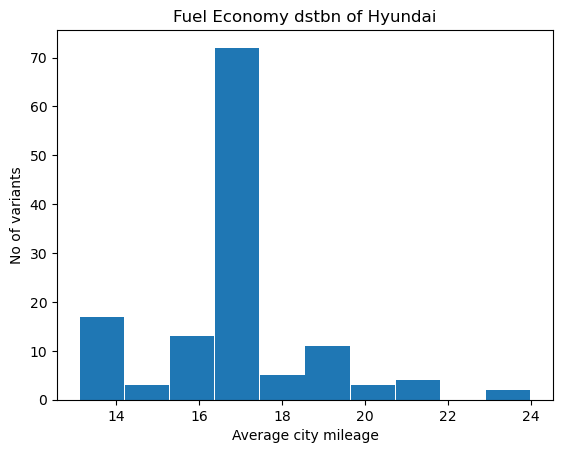

In [75]:
#task 9: Hyundai, Tata, BMW, suzuki company's spread of fuel economy
hyun=data[data['Make']=='Hyundai']
plt.hist(hyun['City_Mileage_km_litre'],rwidth=0.98)
plt.title('Fuel Economy dstbn of Hyundai')
plt.xlabel('Average city mileage')
plt.ylabel('No of variants')
plt.show()
#positively skewed

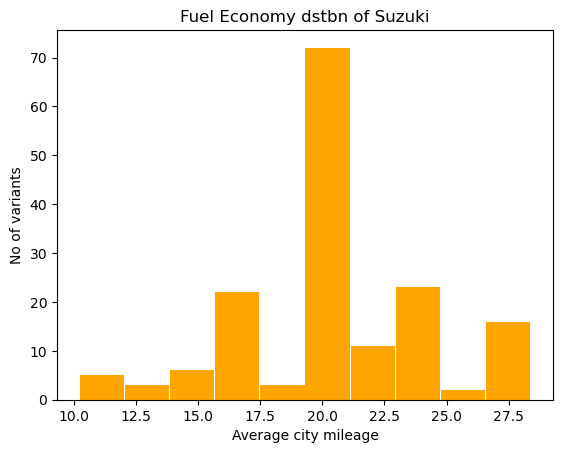

In [77]:
szki=data[(data['Make']=='Maruti Suzuki') | (data['Make']=='Maruti Suzuki R')]
plt.hist(szki['City_Mileage_km_litre'],rwidth=0.98,color='orange')
plt.title('Fuel Economy dstbn of Suzuki')
plt.xlabel('Average city mileage')
plt.ylabel('No of variants')
plt.show()
#slightly negative skewed

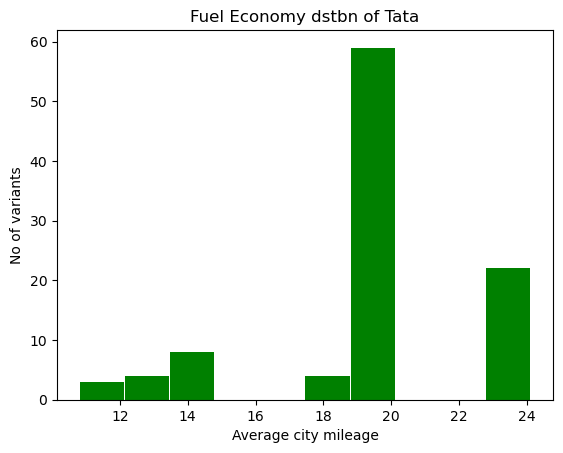

In [79]:
tata=data[data['Make']=='Tata']
plt.hist(tata['City_Mileage_km_litre'],rwidth=0.98,color='green')
plt.title('Fuel Economy dstbn of Tata')
plt.xlabel('Average city mileage')
plt.ylabel('No of variants')
plt.show()
#negatively skewed

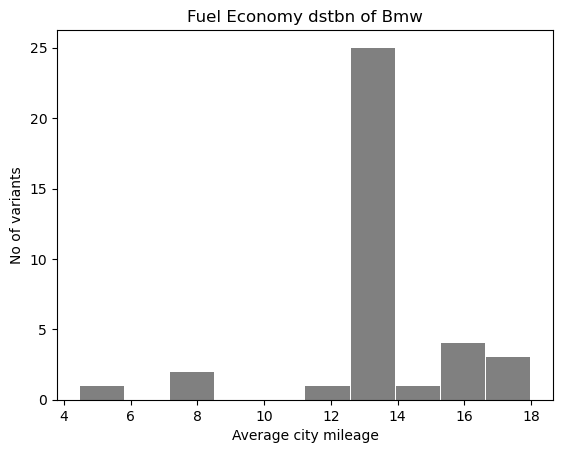

In [81]:
bmw=data[data['Make']=='Bmw']
plt.hist(bmw['City_Mileage_km_litre'],rwidth=0.98,color='grey')
plt.title('Fuel Economy dstbn of Bmw')
plt.xlabel('Average city mileage')
plt.ylabel('No of variants')
plt.show()
#slightly negatively skewed with the data oriented in right side; ie) average mileage is very much less compared to others

In [131]:
#Task 10: create data frame
extra=data.iloc[:][['Make','Valves_Per_Cylinder','Kerb_Weight','Displacement','Fuel_Tank_Capacity_litre','City_Mileage_km_litre','Highway_Mileage_km_litre','Power','Torque','Gross_Vehicle_Weight']]
extra

,Make,Valves_Per_Cylinder,Kerb_Weight,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Power,Torque,Gross_Vehicle_Weight
0,Tata,2.0,660 kg,624.0,24.0,23.600000,20.502439,38.0,51.0,NaN
1,Tata,2.0,725 kg,624.0,24.0,23.600000,20.502439,38.0,51.0,NaN
2,Tata,2.0,710 kg,624.0,15.0,19.233542,20.502439,38.0,51.0,NaN
3,Tata,2.0,725 kg,624.0,24.0,23.600000,20.502439,38.0,51.0,NaN
4,Tata,2.0,725 kg,624.0,24.0,23.600000,20.502439,38.0,51.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1271,Honda,4.0,1170 kg,1498.0,40.0,22.600000,25.100000,100.0,200.0,1545 kg
1272,Honda,4.0,1175 kg,1498.0,40.0,22.600000,25.100000,100.0,200.0,1550 kg
1273,Honda,4.0,1107 kg,1497.0,40.0,18.000000,18.000000,119.0,145.0,1482 kg
1274,Honda,4.0,1080 kg,1497.0,40.0,14.300000,16.400000,119.0,145.0,1455 kg


In [133]:
#Task 11: remove units
extra['Kerb_Weight']=extra['Kerb_Weight'].str.rstrip('kg kg')

In [135]:
#drop rows having non-numeric values
extra=extra.drop(list(extra.loc[extra['Kerb_Weight']=='1016-1043'].index),axis=0)
extra=extra.drop(list(extra.loc[extra['Kerb_Weight']=='1053-1080'].index),axis=0)

In [137]:
extra['Kerb_Weight']=pd.to_numeric(extra['Kerb_Weight'])

In [139]:
extra['Kerb_Weight']=extra['Kerb_Weight'].fillna(extra['Kerb_Weight'].mean())
extra['Kerb_Weight'].isnull().sum()

0

In [141]:
# conversion of weight in kg to punds
extra['Kerb_Weight']=2.2*(extra['Kerb_Weight'])
extra['Kerb_Weight']

0       1452.0
1       1595.0
2       1562.0
3       1595.0
4       1595.0
         ...  
1271    2574.0
1272    2585.0
1273    2435.4
1274    2376.0
1275    5137.0
Name: Kerb_Weight, Length: 1264, dtype: float64

In [143]:
extra['Gross_Vehicle_Weight']=extra['Gross_Vehicle_Weight'].str.rstrip('NAâ€¯ kg')
extra.iloc[314]['Gross_Vehicle_Weight']

'2109'

In [145]:
extra['Gross_Vehicle_Weight'].isnull().sum()

583

In [147]:
extra['Gross_Vehicle_Weight']=pd.to_numeric(extra['Gross_Vehicle_Weight'])

In [149]:
extra['Gross_Vehicle_Weight']=extra['Gross_Vehicle_Weight'].fillna(extra['Gross_Vehicle_Weight'].mean())
extra['Gross_Vehicle_Weight'].isnull().sum()

0

In [151]:
# conversion of weight in kg to punds
extra['Gross_Vehicle_Weight']=2.2*(extra['Gross_Vehicle_Weight'])
extra['Gross_Vehicle_Weight']

0       4193.717647
1       4193.717647
2       4193.717647
3       4193.717647
4       4193.717647
           ...     
1271    3399.000000
1272    3410.000000
1273    3260.400000
1274    3201.000000
1275    6842.000000
Name: Gross_Vehicle_Weight, Length: 1264, dtype: float64

In [153]:
#Task 12:  
pvt_12=data.groupby('Make').agg({'Displacement':['mean','median','std'],'Cylinders':['mean','median','std'],'Valves_Per_Cylinder':['mean','median','std']})
pvt_12

pvt_12.insert(3,'Dsplcmnt_CV',pvt_12['Displacement']['std']/pvt_12['Displacement']['mean']*100)
pvt_12['Cylndr_CV']=pvt_12['Cylinders']['std']/pvt_12['Cylinders']['mean']*100
pvt_12['Vlv_Cylndr_CV']=pvt_12['Valves_Per_Cylinder']['std']/pvt_12['Valves_Per_Cylinder']['mean']*100
pvt_12

Displacement                      Dsplcmnt_CV  Cylinders  \
                         mean  median          std                   mean   
Make                                                                        
Aston Martin      5038.333333  5198.0   986.241519   19.574757  10.666667   
Audi              2256.354839  1984.0   836.304352   37.064399   5.161290   
Bajaj              216.000000   216.0     0.000000    0.000000   4.380992   
Bentley           5447.833333  5974.0  1164.710164   21.379328  10.666667   
Bmw               2707.918919  2979.0   924.567237   34.143092   5.459459   
Bugatti           7993.000000  7993.0     0.000000    0.000000  16.000000   
Datsun            1065.066667  1198.0   179.470836   16.850667   3.000000   
Dc                2000.000000  2000.0          NaN         NaN   4.000000   
Ferrari           4589.500000  3902.0  1125.891647   24.531902   8.500000   
Fiat              1269.391304  1248.0    65.088568    5.127542   4.000000   
Force             2447.000000  2596.0   230.829807    9.433176   4.000000   
Ford              1551.325581  1498.0   635.526618   40.966682   3.883721   
Honda             1444.875000  1498.0   192.049803   13.291794   4.029765   
Hyundai           1354.467728  1197.0   273.889091   20.221160   3.976561   
Icml              1994.000000  1994.0     0.000000    0.000000   4.000000   
Isuzu             2578.800000  2499.0   455.346242   17.657292   4.000000   
Jaguar            2679.545455  1999.0  1171.060030   43.703682   5.108227   
Jeep              2102.357143  1956.0   991.904872   47.180608   5.857143   
Kia               1635.380952  1493.0   327.485950   20.025056   4.199567   
Lamborghini       5409.692308  5204.0   703.121064   12.997432  10.307692   
Land Rover        2795.000000  2993.0   419.529896   15.010014   5.600000   
Land Rover Rover  3199.703704  2993.0  1183.611092   36.991272   6.370370   
Lexus             3491.600000  3456.0   990.103047   28.356715   5.476198   
Mahindra          1721.971506  1497.0   530.524045   30.809107   3.728696   
Maruti Suzuki     1171.731544  1197.0   188.540147   16.090729   3.664430   
Maruti Suzuki R   1083.285714   998.0   102.196966    9.433981   3.000000   
Maserati          3363.888889  2987.0   752.408872   22.367233   5.904775   
Mg                1709.046860  1500.0   239.682742   14.024352   4.058614   
Mini              1897.600000  1998.0   211.661785   11.154183   3.800000   
Mitsubishi        2563.571429  2477.0   284.005785   11.078520   4.000000   
Nissan            1507.379310  1461.0   454.160247   30.129128   3.896552   
Not Available     2991.370728  2143.0  1726.403057   57.712775   5.960000   
Porsche           3062.928571  2995.0   733.485616   23.947200   6.285714   
Premier           1343.500000  1368.5   161.722911   12.037433   4.000000   
Renault           1238.583333  1461.0   269.404568   21.751025   3.555556   
Skoda             1720.581395  1798.0   207.255333   12.045657   4.000000   
Tata              1421.248275  1248.0   404.776419   28.480345   3.506669   
Toyota            1803.292683  1496.0   641.799947   35.590448   4.048780   
Volkswagen        1466.294118  1498.0   310.309282   21.162827   3.879558   
Volvo             1975.555556  1969.0   138.270078    6.999048   4.500000   

                                      Valves_Per_Cylinder                      \
                     median       std                mean    median       std   
Make                                                                            
Aston Martin      12.000000  2.309401            4.000000  4.000000  0.000000   
Audi               4.000000  1.614451            4.772765  4.000000  2.997159   
Bajaj              4.380992  0.000000            1.000000  1.000000  0.000000   
Bentley           12.000000  2.065591            4.000000  4.000000  0.000000   
Bmw                6.000000  1.608909            4.000000  4.000000  0.000000   
Bugatti           16.000000  0.000000            4.000000

Text(0.5, 1.0, 'Boxplot: Displacement for each Makers')

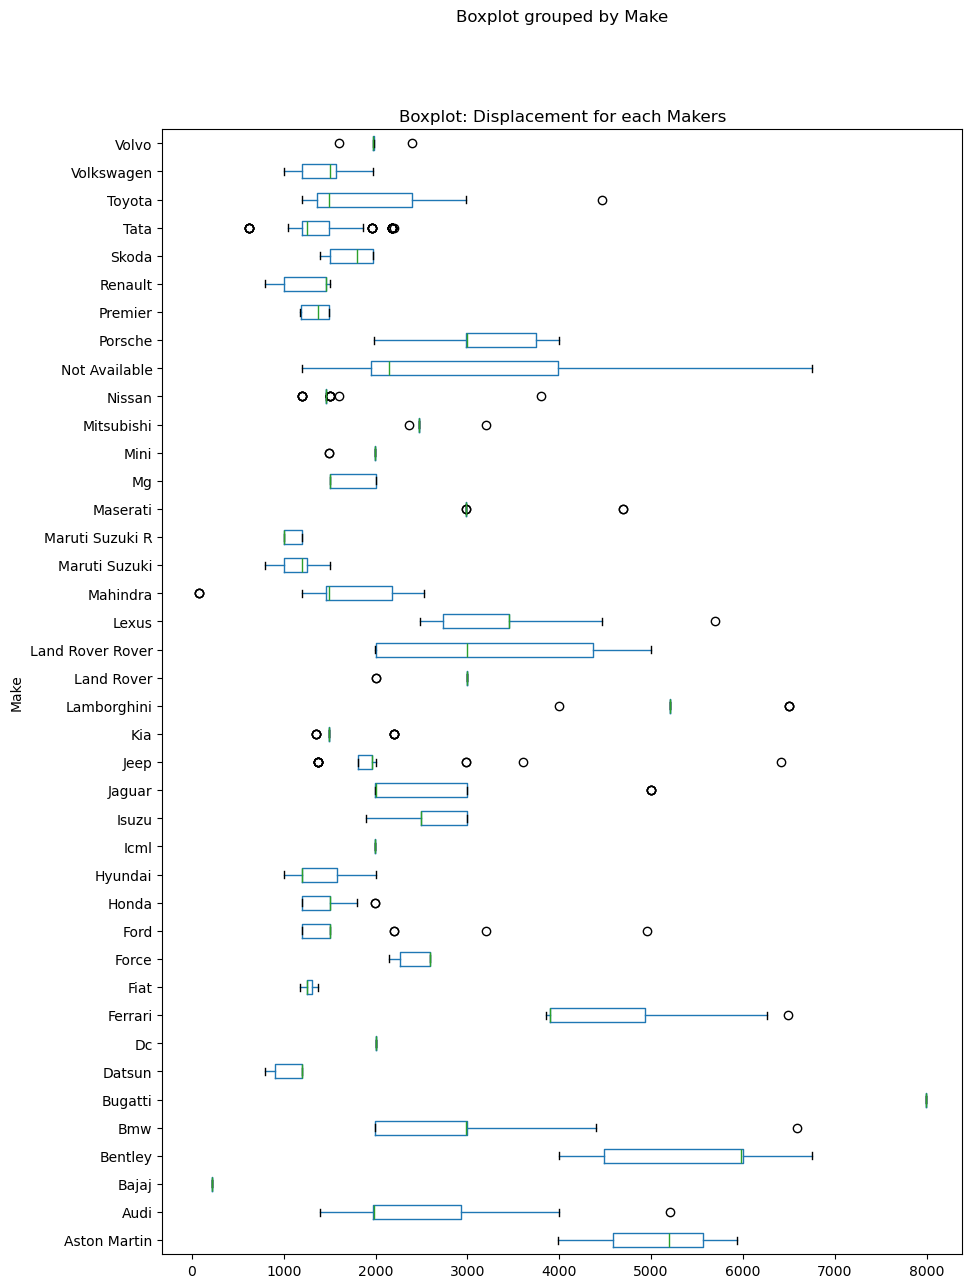

In [155]:
data.boxplot(by='Make',column=['Displacement'],grid=False,figsize=(10,15),vert=0)
plt.title('Boxplot: Displacement for each Makers')
#all makers their displacement, cylinders and valve per cylinder were calculated for mean, median, standard deviation and coefficient of variation

In [157]:
#task 13:
filter2=data[(data['Make']=='Toyota')|(data['Make']=='Renault')|(data['Make']=='Honda')]
filter2

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning,Avg_mileage
12,12,Renault,Kwid,Rxe 0.8,799.0,3.0,4.0,28.0,Petrol,1490.0,...,Yes,NaN,Not Available,NaN,Yes,NaN,Driver frontal airbag,Yes,Yes,21.43
13,13,Renault,Kwid,Std 0.8,799.0,3.0,4.0,28.0,Petrol,1490.0,...,NaN,NaN,Not Available,NaN,Yes,NaN,Driver frontal airbag,NaN,Yes,21.43
14,14,Renault,Kwid,Rxl 0.8,799.0,3.0,4.0,28.0,Petrol,1490.0,...,Yes,NaN,Not Available,NaN,Yes,NaN,Driver frontal airbag,Yes,Yes,21.43
15,15,Renault,Kwid,Rxt 0.8,799.0,3.0,4.0,28.0,Petrol,1490.0,...,Yes,NaN,Not Available,NaN,Yes,NaN,Driver frontal airbag,Yes,Yes,21.43
16,16,Renault,Kwid,Rxt 1.0,999.0,3.0,4.0,28.0,Petrol,1490.0,...,Yes,NaN,Not Available,NaN,Yes,NaN,Driver frontal airbag,Yes,Yes,21.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,1270,Honda,City,V Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,NaN,Not Available,Yes,Yes,1523 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,24.10
1271,1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,NaN,Not Available,Yes,Yes,1545 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes,23.85
1272,1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,NaN,Not Available,Yes,Yes,1550 kg,"Drive side airbag, Curtain airbags, Driver fro...",Yes,Yes,23.85
1273,1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,...,Yes,NaN,Not Available,Yes,Yes,1482 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes,18.00


In [159]:
correl_mat=filter2[['Displacement','Fuel_Tank_Capacity_litre','City_Mileage_km_litre','Highway_Mileage_km_litre','Height_mm','Length_mm','Power','Torque']].corr()
correl_mat

,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Height_mm,Length_mm,Power,Torque
Displacement,1.000000,0.846540,-0.593554,-0.395999,0.706715,0.785845,0.933356,0.875644
Fuel_Tank_Capacity_litre,0.846540,1.000000,-0.548097,-0.447802,0.729066,0.734876,0.777468,0.803378
City_Mileage_km_litre,-0.593554,-0.548097,1.000000,0.464001,-0.396024,-0.536053,-0.646385,-0.380719
Highway_Mileage_km_litre,-0.395999,-0.447802,0.464001,1.000000,-0.454041,-0.264948,-0.470101,-0.253758
Height_mm,0.706715,0.729066,-0.396024,-0.454041,1.000000,0.535572,0.632855,0.723860
Length_mm,0.785845,0.734876,-0.536053,-0.264948,0.535572,1.000000,0.824191,0.691952
Power,0.933356,0.777468,-0.646385,-0.470101,0.632855,0.824191,1.000000,0.789940
Torque,0.875644,0.803378,-0.380719,-0.253758,0.723860,0.691952,0.789940,1.000000


<Axes: >

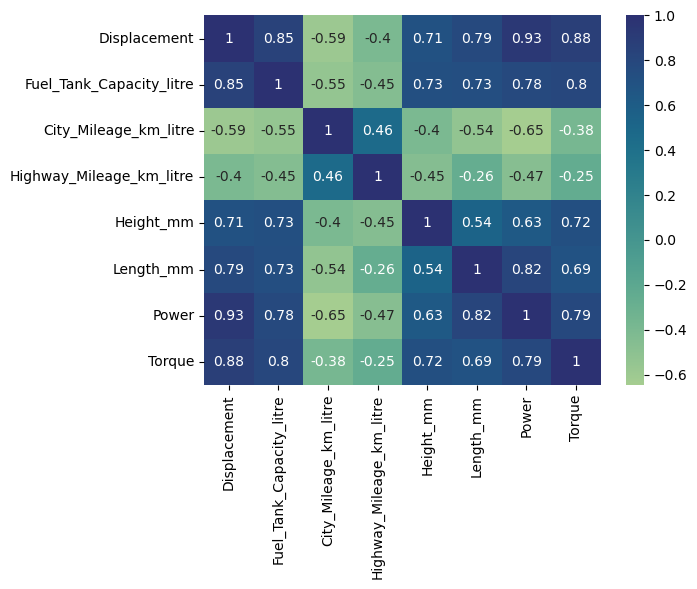

In [175]:
sns.heatmap(correl_mat,annot=True,cmap='crest')

In [167]:
#task 14
fltr=extra.loc[0:,['Make','Kerb_Weight','Gross_Vehicle_Weight']]
fltr

,Make,Kerb_Weight,Gross_Vehicle_Weight
0,Tata,1452.0,4193.717647
1,Tata,1595.0,4193.717647
2,Tata,1562.0,4193.717647
3,Tata,1595.0,4193.717647
4,Tata,1595.0,4193.717647
...,...,...,...
1271,Honda,2574.0,3399.000000
1272,Honda,2585.0,3410.000000
1273,Honda,2435.4,3260.400000
1274,Honda,2376.0,3201.000000


In [169]:
cntrl=fltr.groupby("Make").agg({'Kerb_Weight':['mean','median','std'],'Gross_Vehicle_Weight':['mean','median','std']})
cntrl

cntrl.insert(3,'Kerb_Weight_CV', cntrl['Kerb_Weight']['std'] / cntrl['Kerb_Weight']['mean'] * 100)
cntrl['Gross_Vehicle_Weight_CV'] = cntrl['Gross_Vehicle_Weight']['std'] / cntrl['Gross_Vehicle_Weight']['mean'] * 100
cntrl
# kerb weight and gross weight for all makers were calculated for mean, median, standard deviation and coefficient of variation

Kerb_Weight                           Kerb_Weight_CV  \
                         mean       median          std                  
Make                                                                     
Aston Martin      3813.333333  3696.000000   516.102057      13.534145   
Audi              3982.000000  3916.000000   753.233651      18.915963   
Bajaj             3062.025584  3062.025584     0.000000       0.000000   
Bentley           5407.233333  5335.000000   268.974331       4.974343   
Bmw               3466.859712  3498.000000   404.712418      11.673747   
Bugatti           4389.000000  4389.000000     0.000000       0.000000   
Datsun            2365.290234  1900.800000   588.848846      24.895416   
Dc                3476.000000  3476.000000          NaN            NaN   
Ferrari           3594.250000  3470.500000   449.627703      12.509639   
Fiat              2678.610920  2673.000000   164.833888       6.153708   
Force             3062.025584  3062.025584     0.000000       0.000000   
Ford              2811.788747  2695.000000   790.538424      28.115143   
Honda             2486.057049  2424.400000   354.218507      14.248205   
Hyundai           2839.487104  3062.025584   373.868426      13.166759   
Icml              3778.800000  3762.000000    28.773321       0.761441   
Isuzu             3783.410234  4257.000000   658.592320      17.407373   
Jaguar            3713.148943  3747.700000   342.252281       9.217305   
Jeep              3730.950914  3436.400000   699.095061      18.737718   
Kia               3062.025584  3062.025584     0.000000       0.000000   
Lamborghini       3316.357782  3128.400000   485.589009      14.642238   
Land Rover        3367.900467  3062.025584   644.840873      19.146673   
Land Rover Rover  4615.598278  4694.800000  1036.863687      22.464340   
Lexus             4801.940000  4944.500000   752.342854      15.667477   
Mahindra          3335.725935  3062.025584   497.148966      14.903771   
Maruti Suzuki     2070.800343  2013.000000   357.718558      17.274411   
Maruti Suzuki R   2885.450501  3062.025584   448.846029      15.555492   
Maserati          3762.119639  3982.000000   539.853385      14.349713   
Mg                3062.025584  3062.025584     0.000000       0.000000   
Mini              3083.810234  3038.012792   450.380720      14.604683   
Mitsubishi        4311.057143  4257.000000   473.287886      10.978465   
Nissan            2991.362472  3062.025584   299.364407      10.007627   
Not Available     3931.886202  3487.000000  1024.984525      26.068520   
Porsche           4120.860798  4103.000000   970.709152      23.555980   
Premier           2471.333333  2519.000000    73.844882       2.988058   
Renault           2337.397287  2851.200000   673.983453      28.834784   
Skoda             2960.841860  2948.000000   372.176373      12.569951   
Tata              2913.753513  3062.025584   850.360921      29.184381   
Toyota            2786.862848  2420.000000   887.053188      31.829811   
Volkswagen        2653.717647  2525.600000   436.796021      16.459778   
Volvo             4450.150130  3658.600000  1503.999049      33.796591   

                 Gross_Vehicle_Weight                            \
                                 mean       median          std   
Make                                                              
Aston Martin              4321.878431  4193.717647   221.980990   
Audi                      5013.248956  4807.000000   857.480547   
Bajaj                     4193.717647  4193.717647     0.000000   
Bentley                   6744.466667  6789.200000   443.500939   
Bmw                       4630.611765  4193.717647   635.518023   
Bugatti                   4193.717647  4193.717647     0.000000   
Datsun                    4193.717647  4193.717647     0.000000   
Dc                        3476.000000  3476.000000          NaN   
Ferrari                   4193.717647  4193.717647     0.000000   
Fiat                      3890.